In [1]:
import pandas as pd
import numpy as np
import ast
import pickle
from pathlib import Path
import multirecording_spikeanalysis as spike

In [2]:
cols = ['condition ', 'session_dir', 'all_subjects', 'tone_start_timestamp', 'tone_stop_timestamp']

# Load the data
df = pd.read_excel('rce_pilot_2_per_video_trial_labels.xlsx', usecols=cols, engine='openpyxl')

In [3]:
df2 = df.dropna() # Drop the rows missing data
df3 = df2.copy()
df3['all_subjects'] = df3['all_subjects'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) # Make the 'all_subjects' column readable as a list
df4 = df3[df3['all_subjects'].apply(lambda x: len(x) < 3)] # Ignore novel sessions for now

In [4]:
# Initialize an empty list to collect data for the new DataFrame
new_df_data = []

for _, row in df4.iterrows():
    session_dir = row['session_dir']
    subjects = row['all_subjects']
    condition = row['condition ']

    # Split session_dir on '_subj_' and take the first part only
    # This ensures everything after '_subj_' is ignored
    base_session_dir = session_dir.split('_subj_')[0]

    for subject in subjects:
        subject_formatted = subject.replace('.', '-')
        # Append formatted subject to the base session_dir correctly
        subj_recording = f"{base_session_dir}_subj_{subject_formatted}"
        new_df_data.append({
            'session_dir': session_dir,
            'subject': subject,
            'subj_recording': subj_recording,
            'condition': condition if condition in ['rewarded', 'omission', 'both_rewarded', 'tie'] else ('win' if str(condition) == str(subject) else 'lose'),
            'tone_start_timestamp': row['tone_start_timestamp'],
            'tone_stop_timestamp': row['tone_stop_timestamp']
        })

# Convert list to DataFrame
new_df = pd.DataFrame(new_df_data)
new_df = new_df.drop_duplicates()

In [5]:
# Prepare timestamp_dicts from new_df
timestamp_dicts = {}
for _, row in new_df.iterrows():
    key = row['subj_recording']
    condition = row['condition']
    timestamp_start = int(row['tone_start_timestamp']) // 20
    timestamp_end = int(row['tone_stop_timestamp']) // 20
    tuple_val = (timestamp_start, timestamp_end)

    if key not in timestamp_dicts:
        timestamp_dicts[key] = {cond: [] for cond in ['rewarded', 'win', 'lose', 'omission', 'both_rewarded', 'tie']}
    timestamp_dicts[key][condition].append(tuple_val)

# Convert lists in timestamp_dicts to numpy arrays
for subj_recording in timestamp_dicts:
    for condition in timestamp_dicts[subj_recording]:
        timestamp_dicts[subj_recording][condition] = np.array(timestamp_dicts[subj_recording][condition], dtype=np.int64)

In [6]:
# Construct the path in a platform-independent way (HiPerGator or Windows)
ephys_path = Path('.') / 'export' / 'updated_phys' / 'non-novel' / 'omission'

ephys_data = spike.EphysRecordingCollection(str(ephys_path))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1-1_t1b2L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec
Please

In [7]:
for recording in ephys_data.collection.keys():
    # Check if the recording key (without everything after subject #) is in timestamp_dicts
    start_pos = recording.find('subj_')
    # Add the length of 'subj_' and 3 additional characters to include after 'subj_'
    end_pos = start_pos + len('subj_') + 3
    # Slice the recording key to get everything up to and including the subject identifier plus three characters
    recording_key_without_suffix = recording[:end_pos]
    if recording_key_without_suffix in timestamp_dicts:
        # Assign the corresponding timestamp_dicts dictionary to event_dict
        ephys_data.collection[recording].event_dict = timestamp_dicts[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        subject = recording[start:start+3]
        
        # Assign the extracted subject
        ephys_data.collection[recording].subject = subject

pickle.dump(ephys_data, open("omission_ephys_data.pkl", "wb"))

In [8]:
omission_spikes = spike.SpikeAnalysis_MultiRecording(ephys_data)

All set to analyze


C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

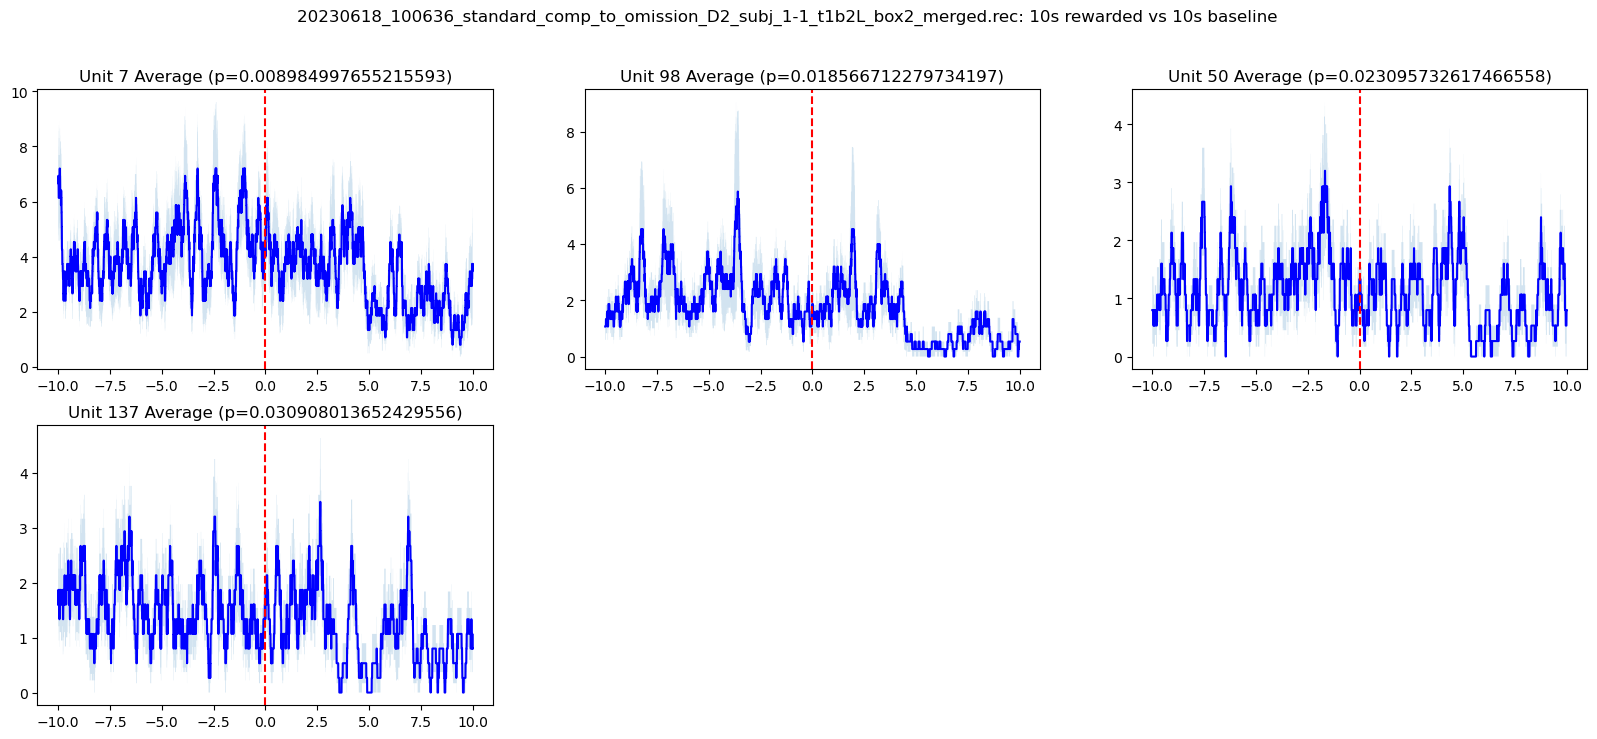

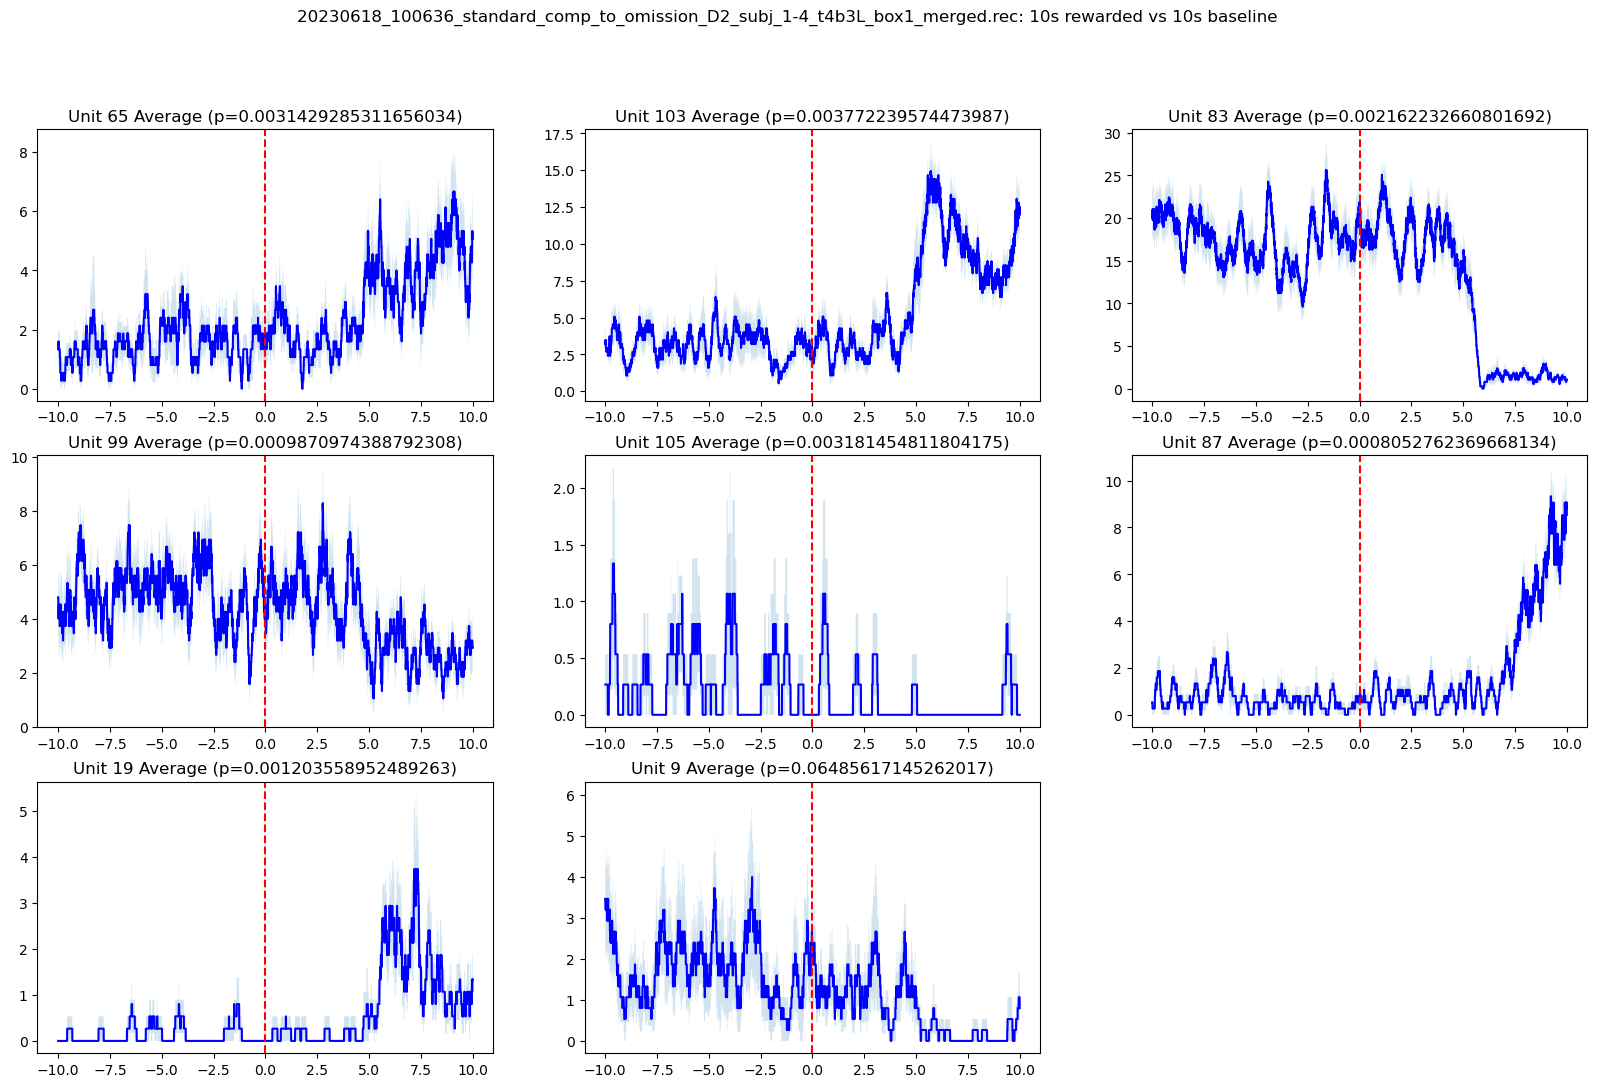

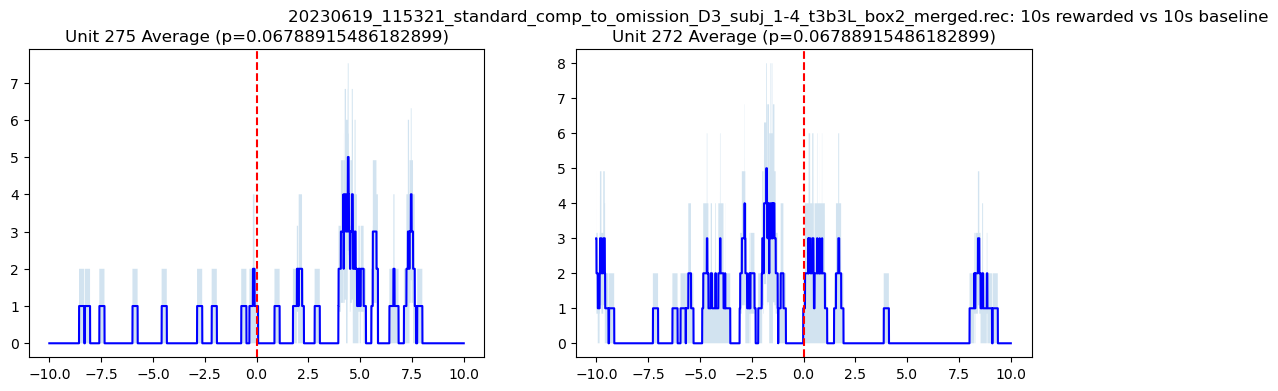

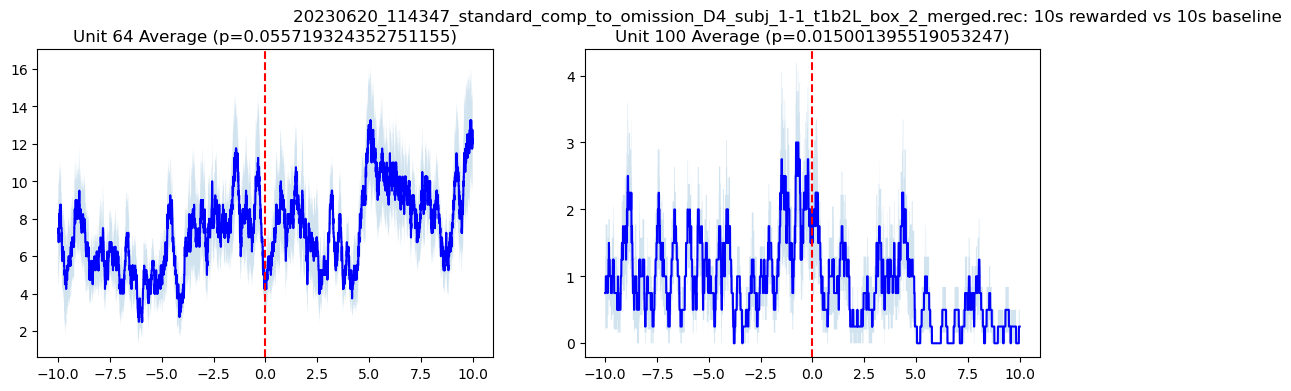

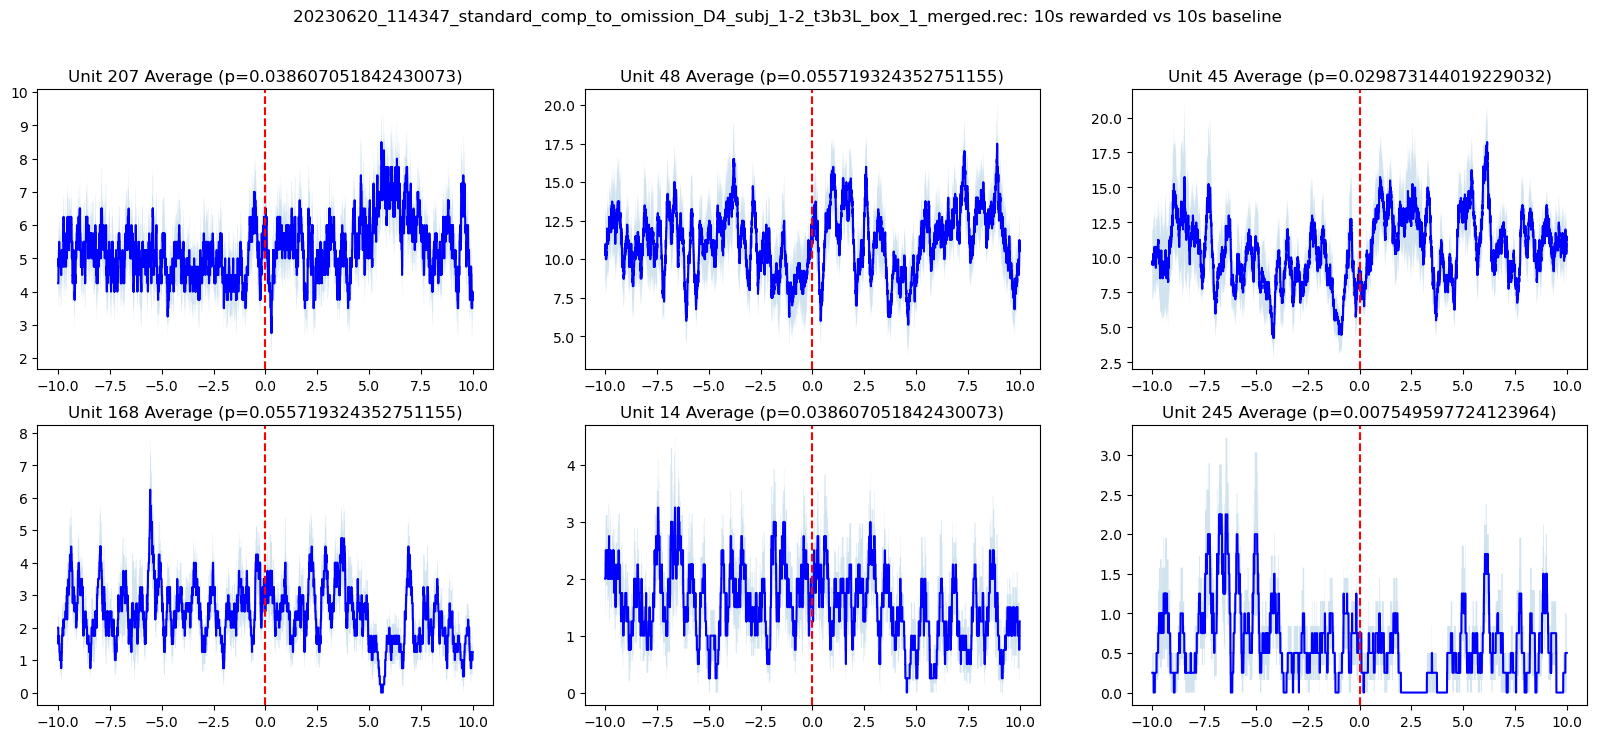

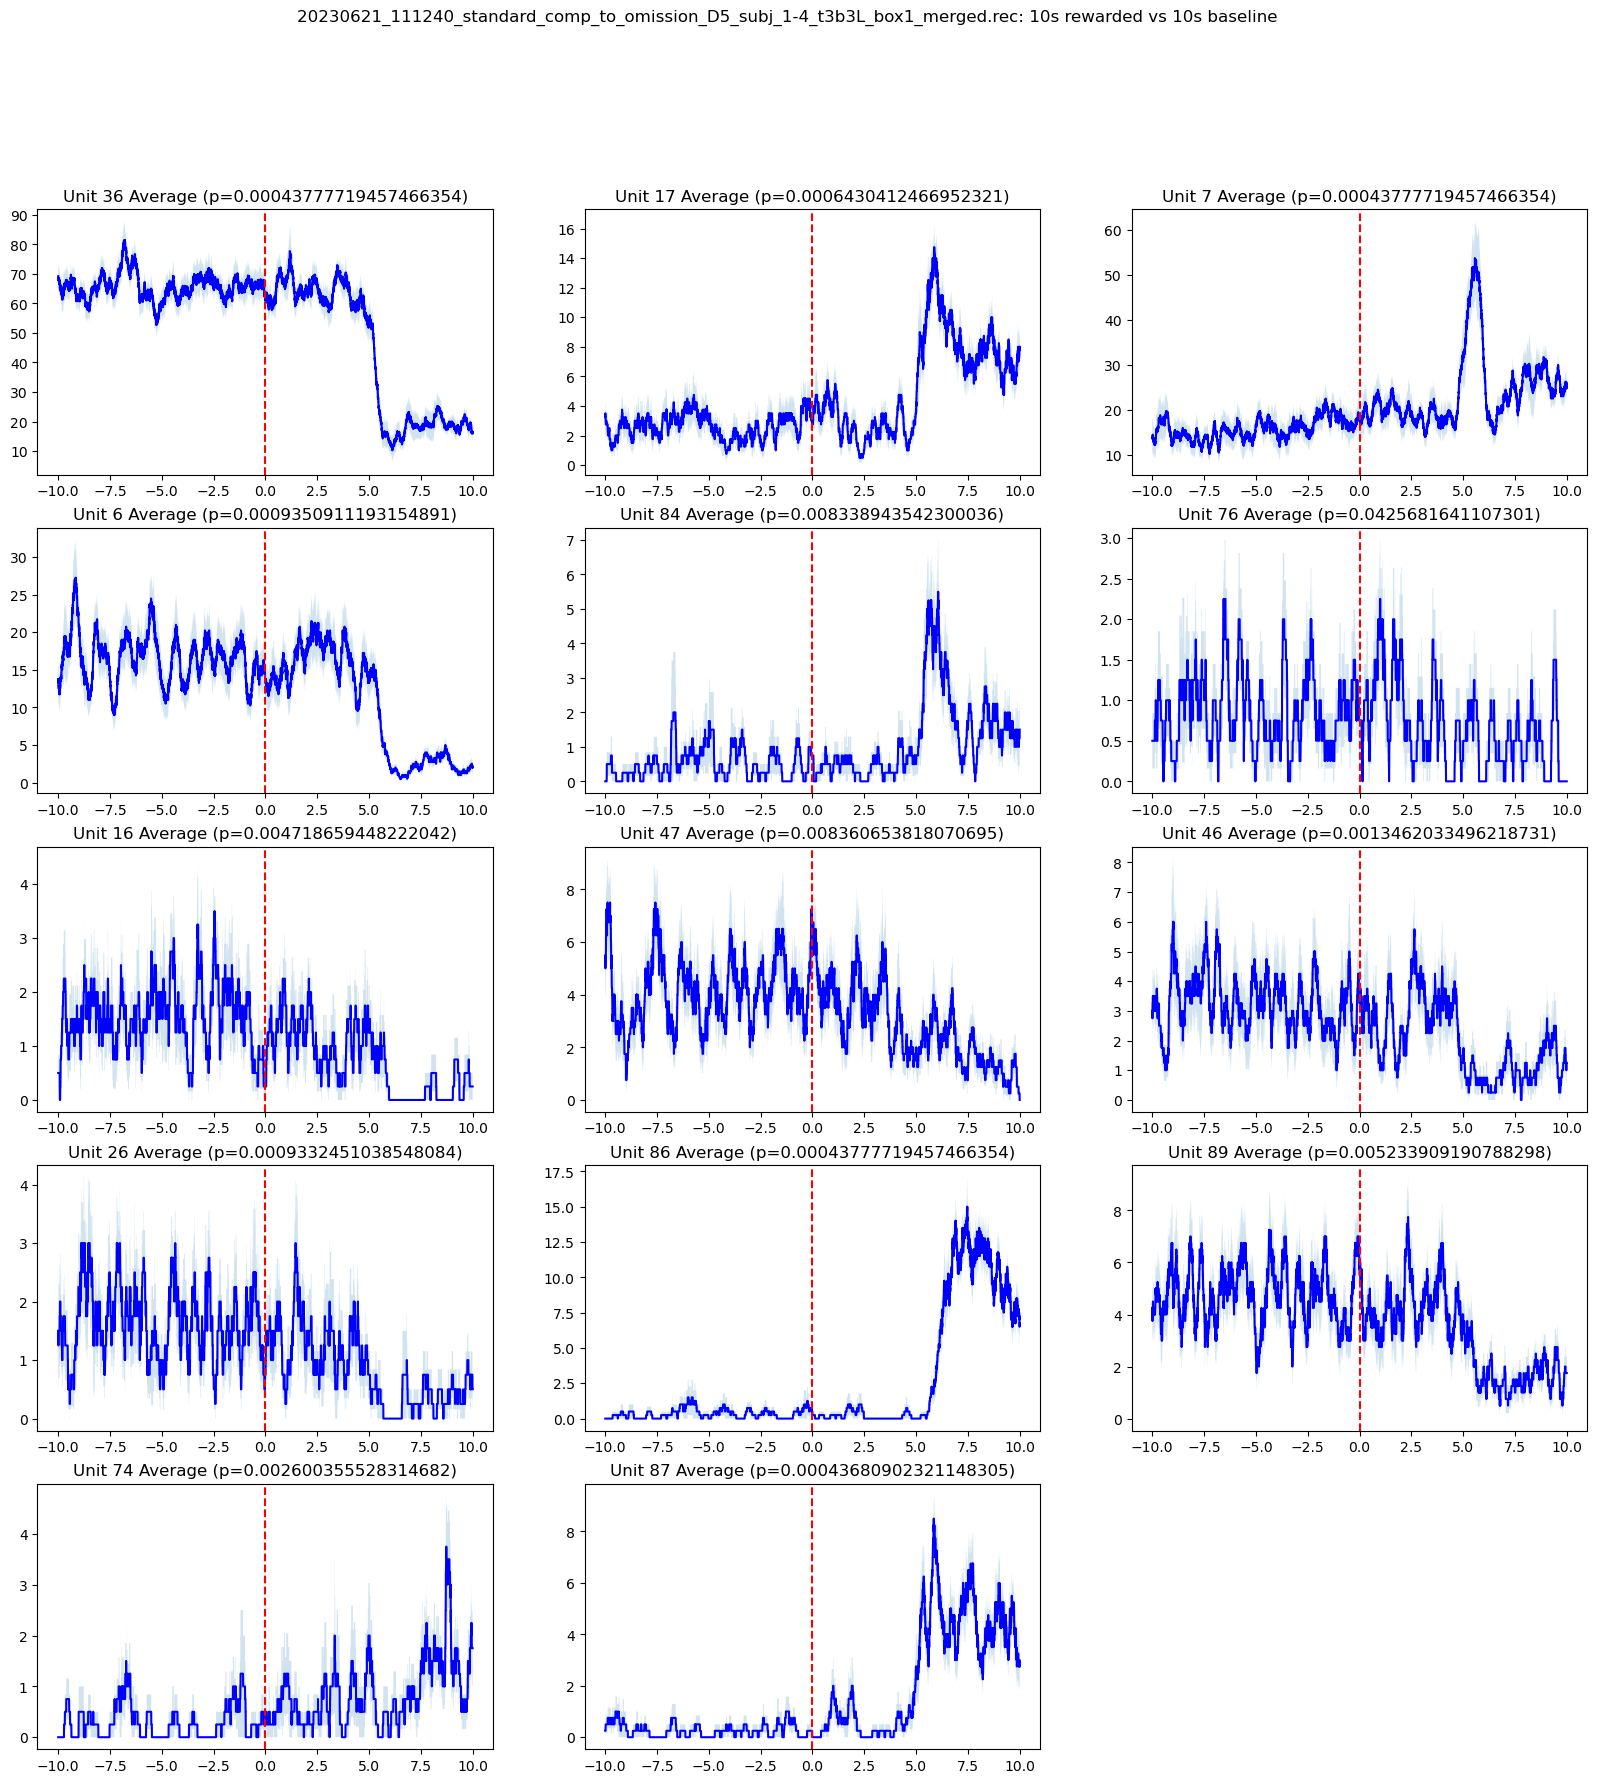

C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal ap

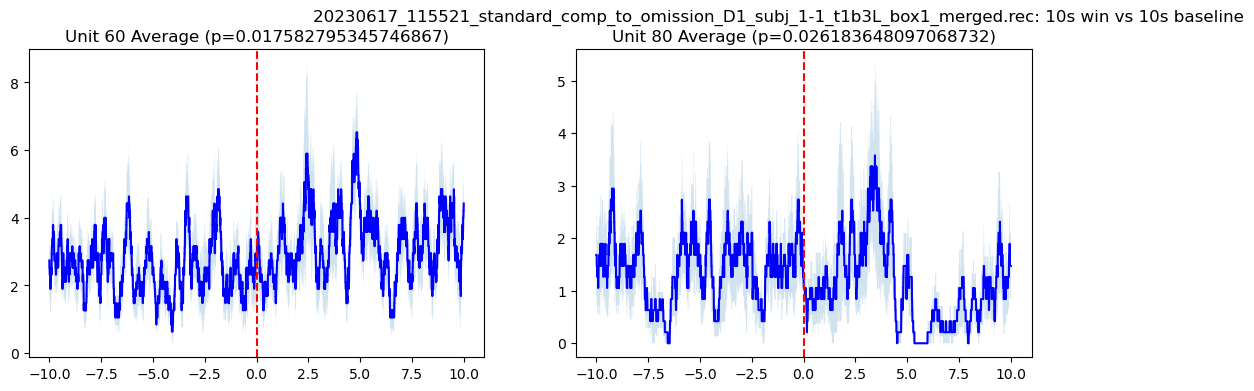

<Figure size 2000x0 with 0 Axes>

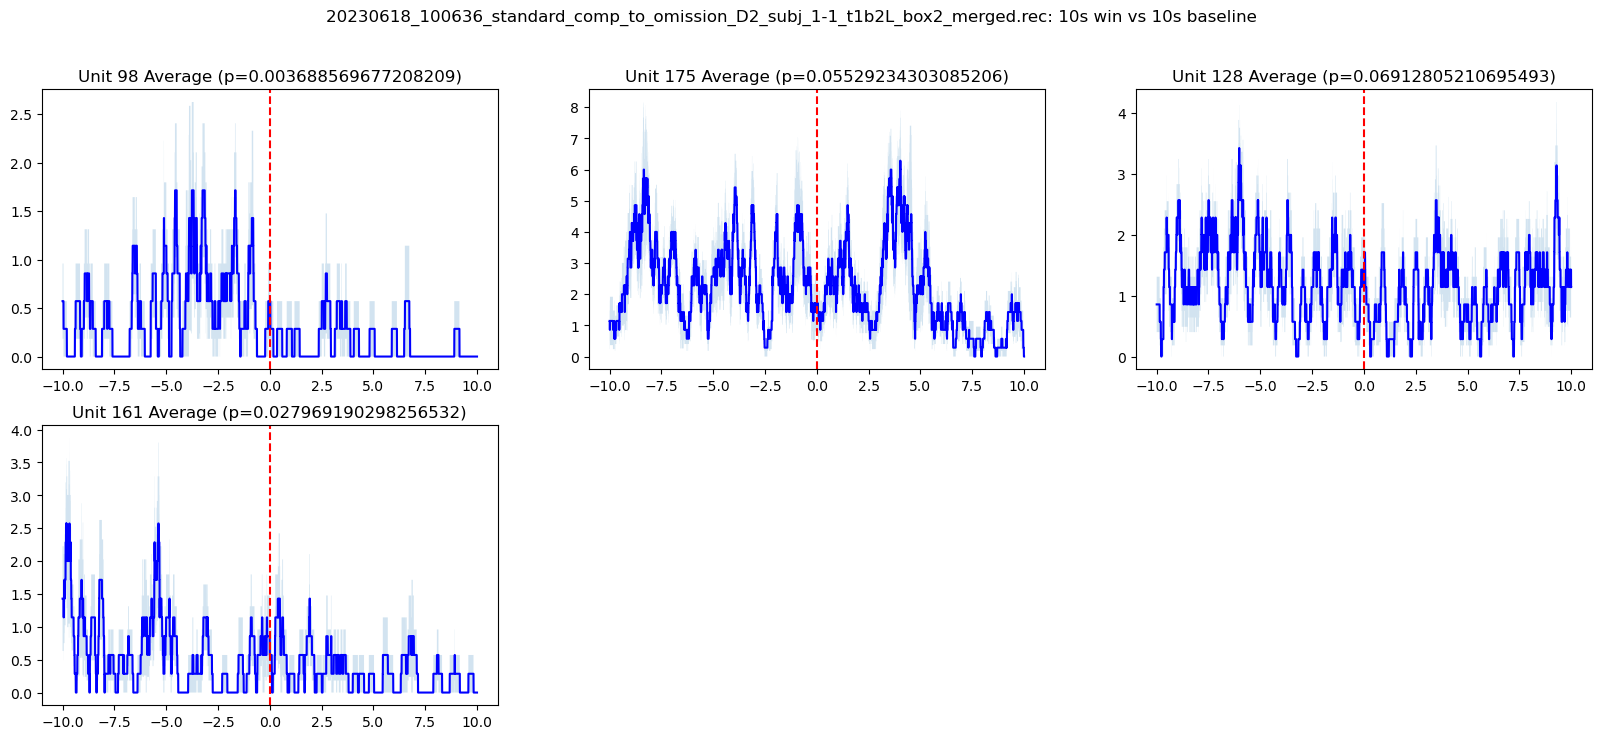

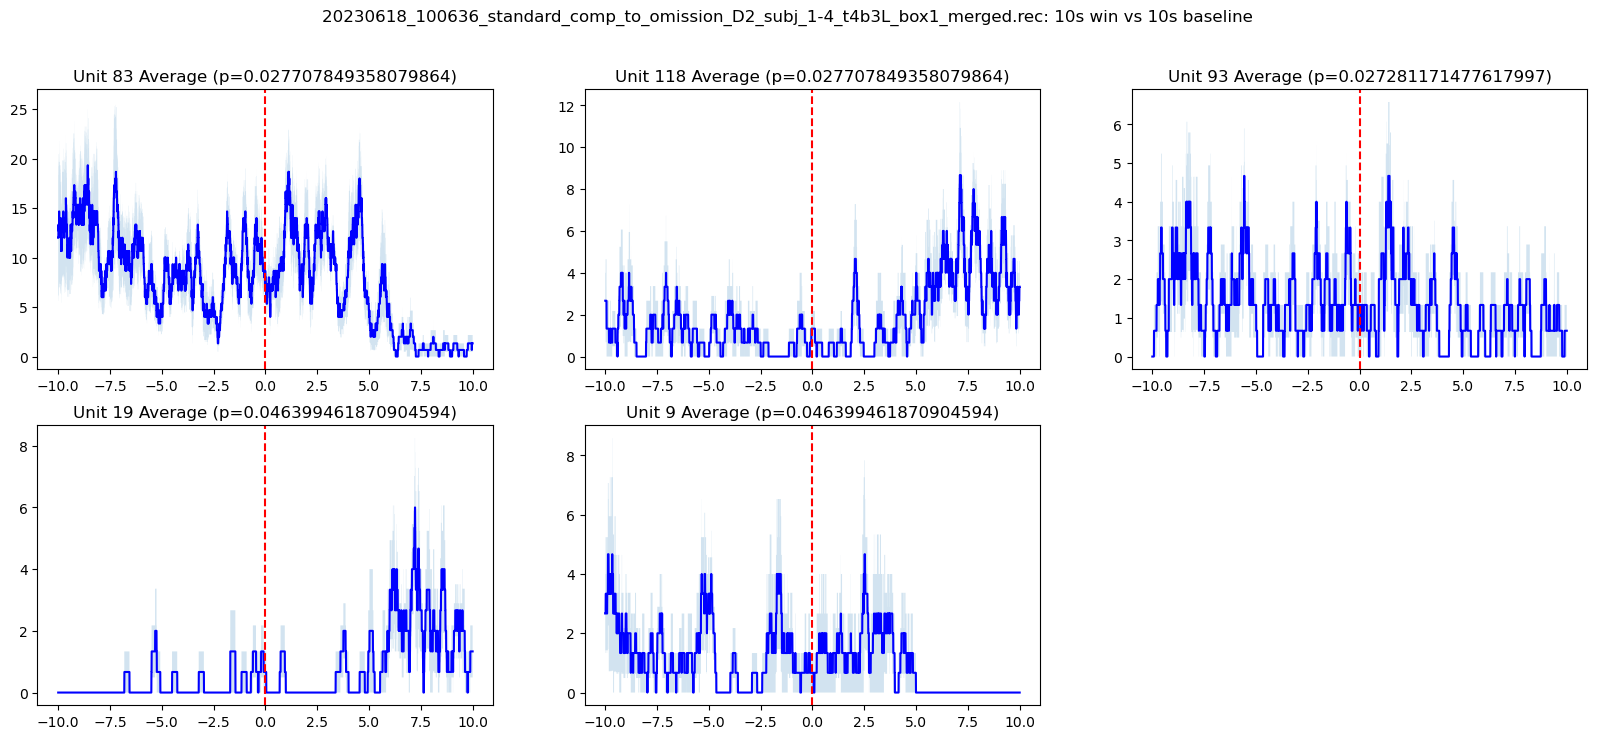

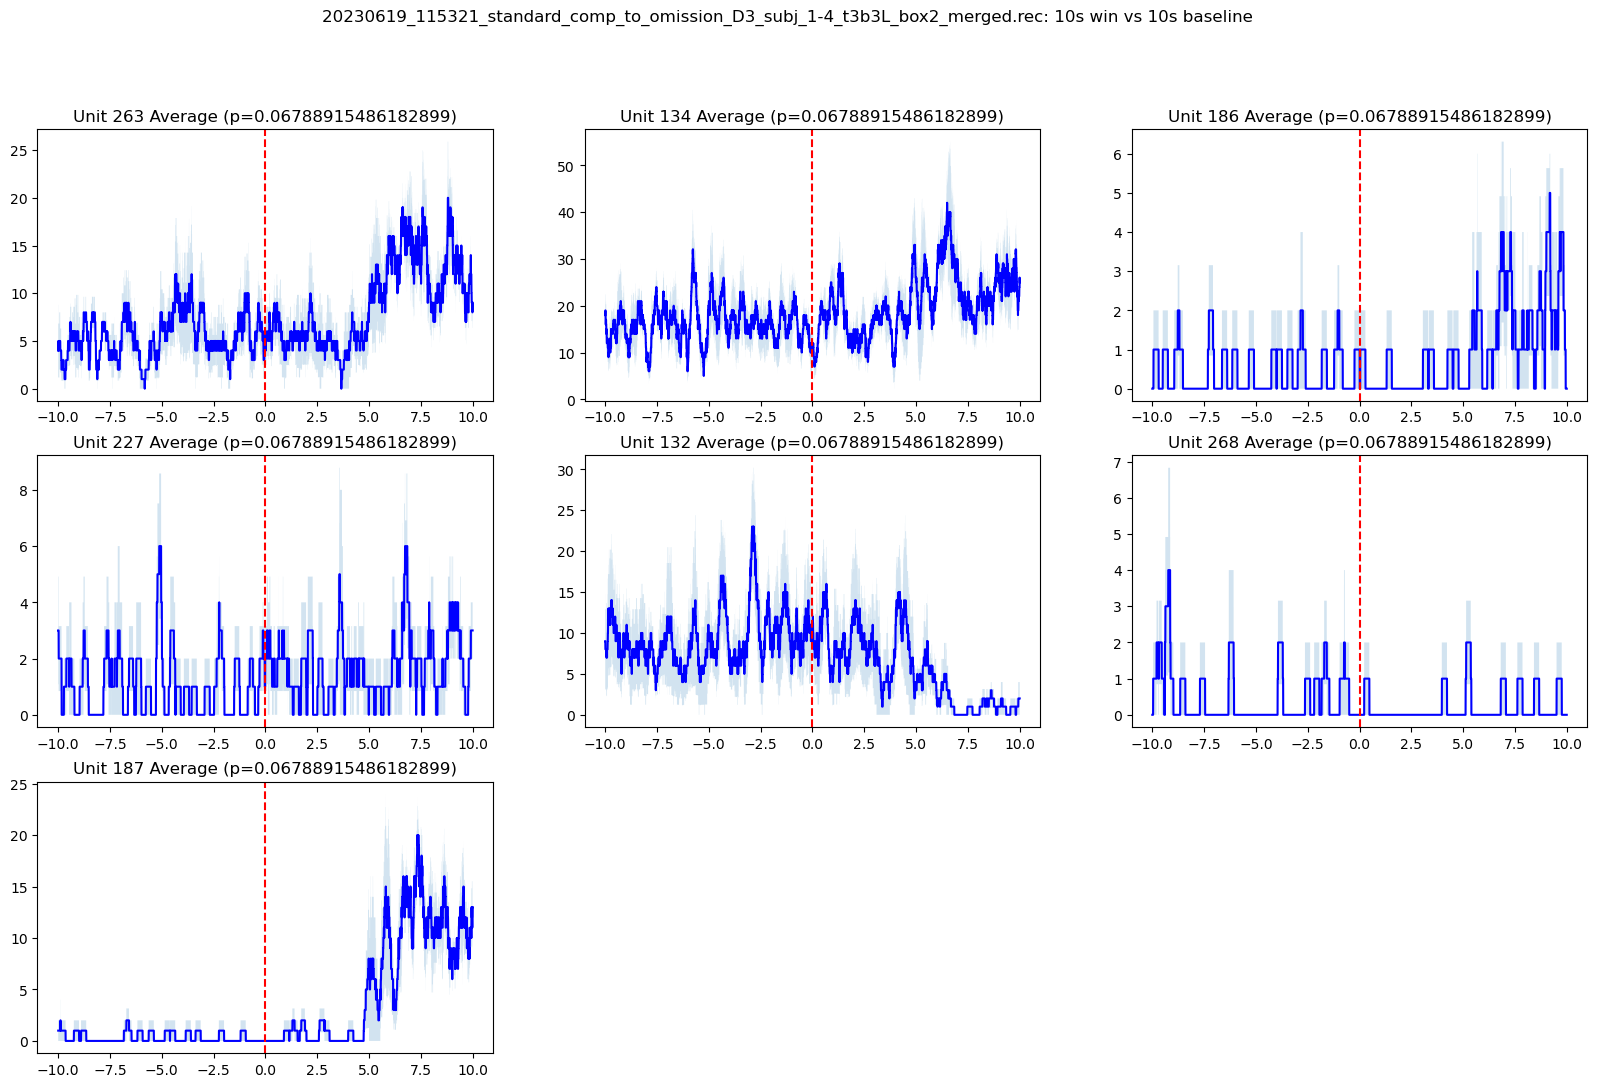

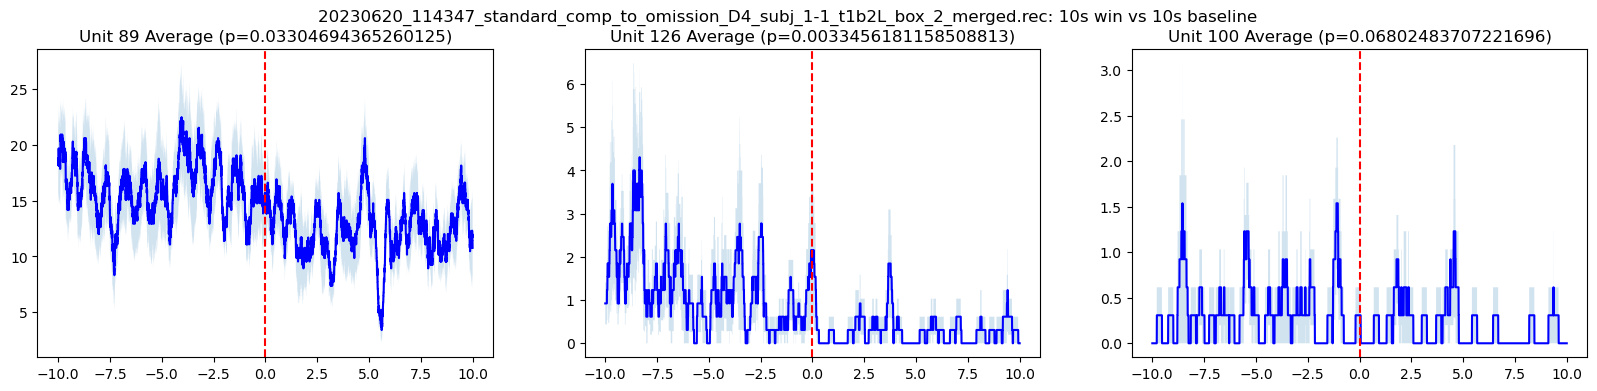

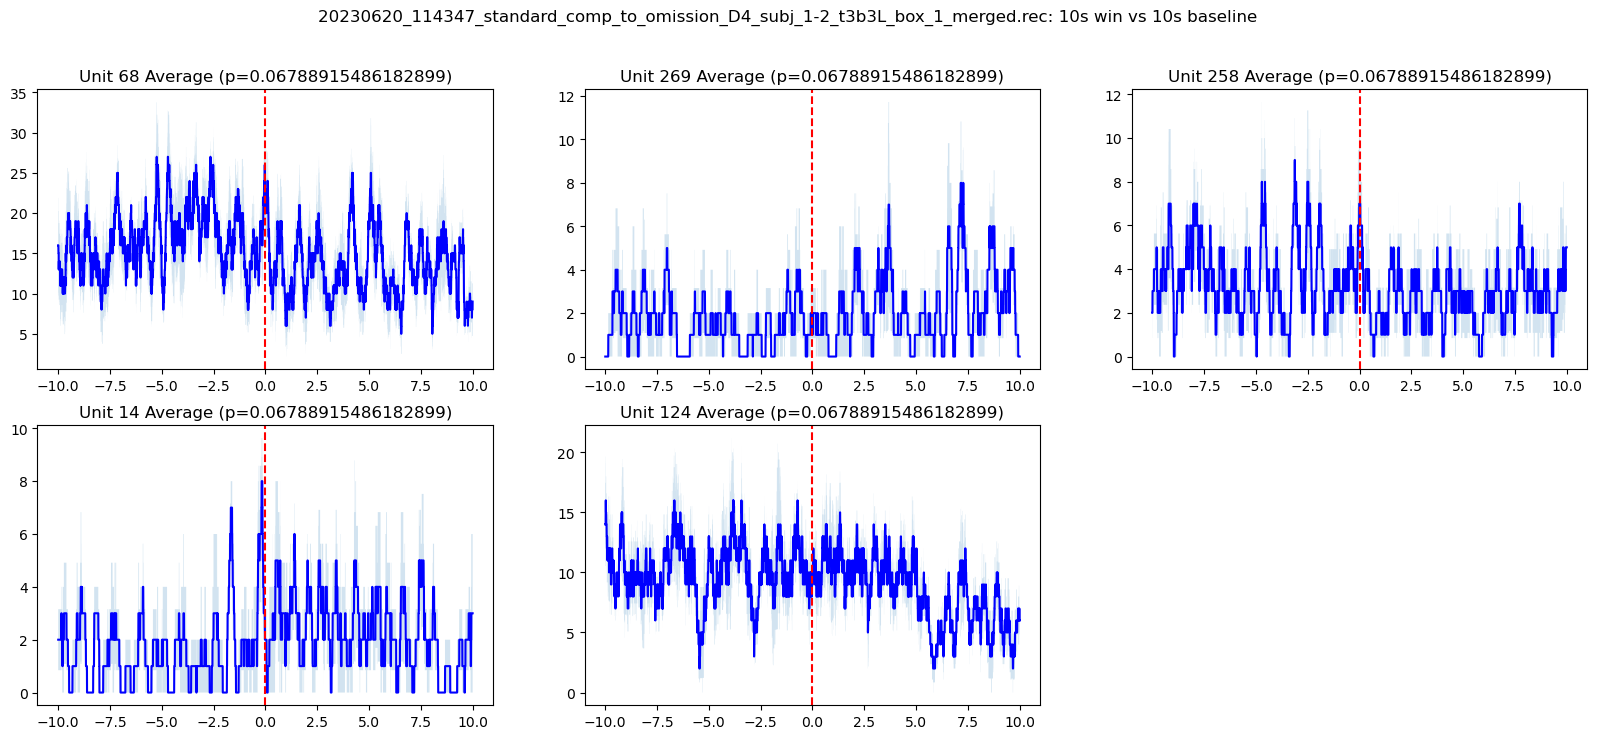

<Figure size 2000x0 with 0 Axes>

C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


<Figure size 2000x0 with 0 Axes>

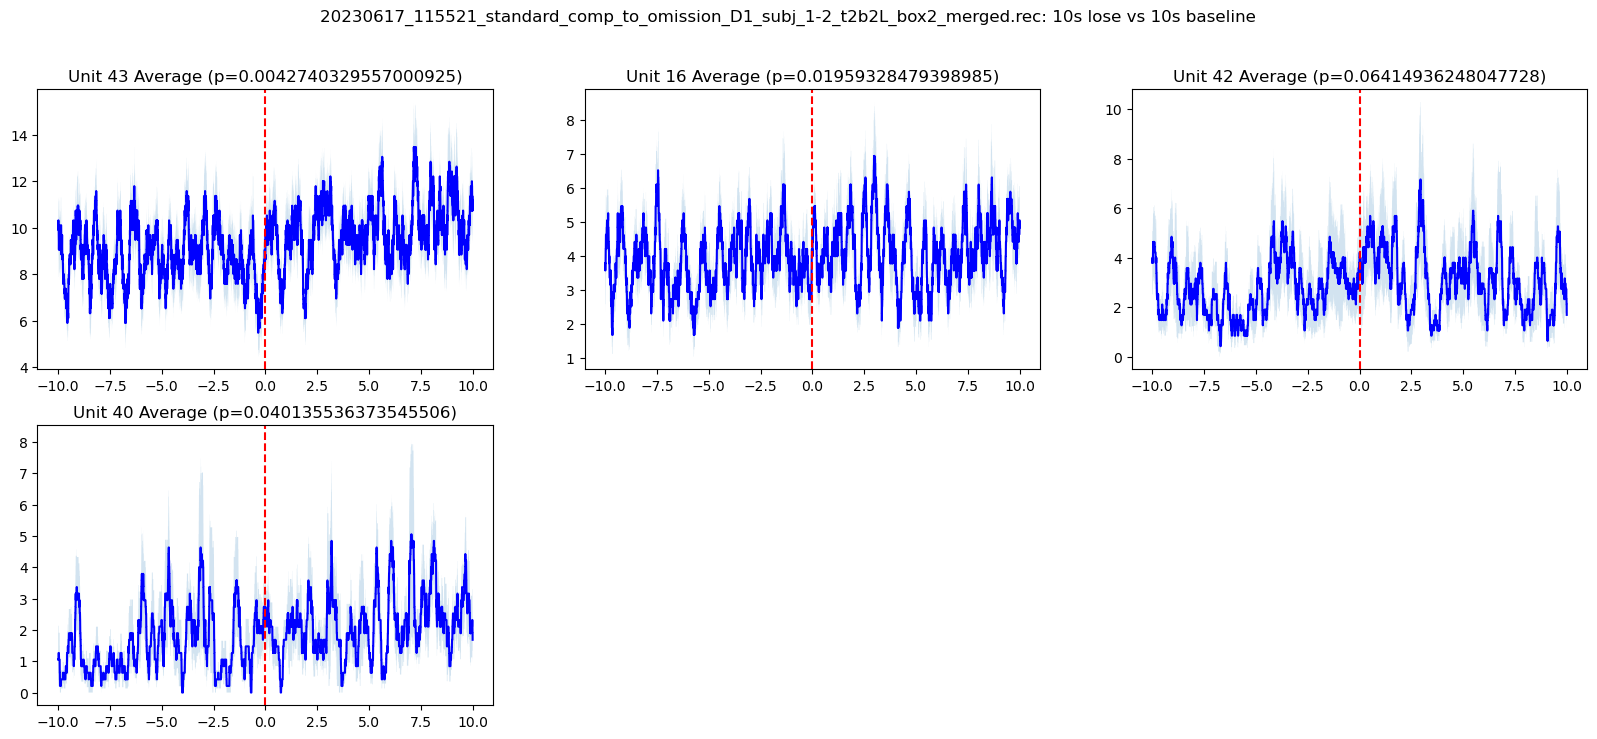

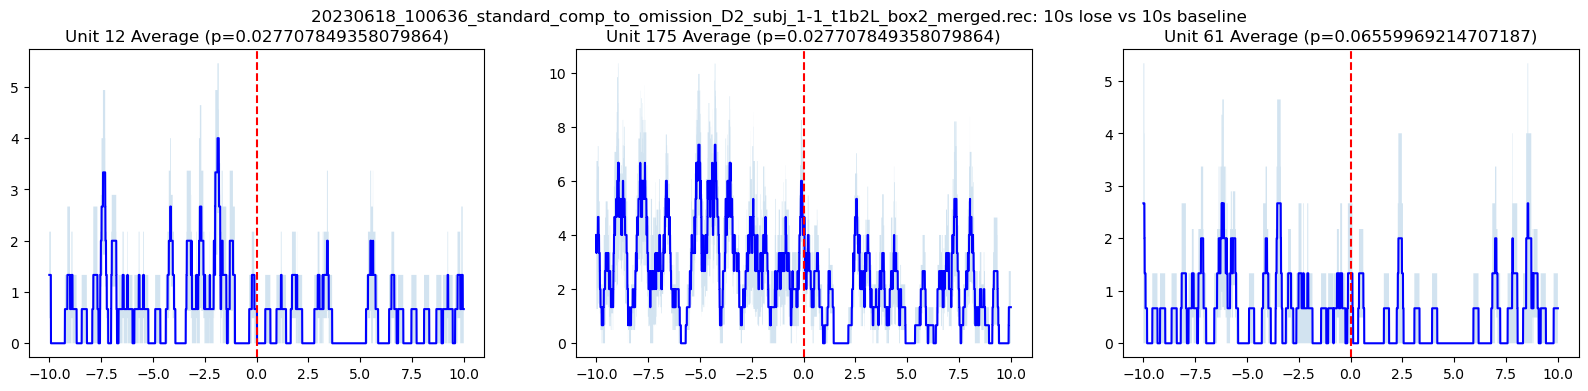

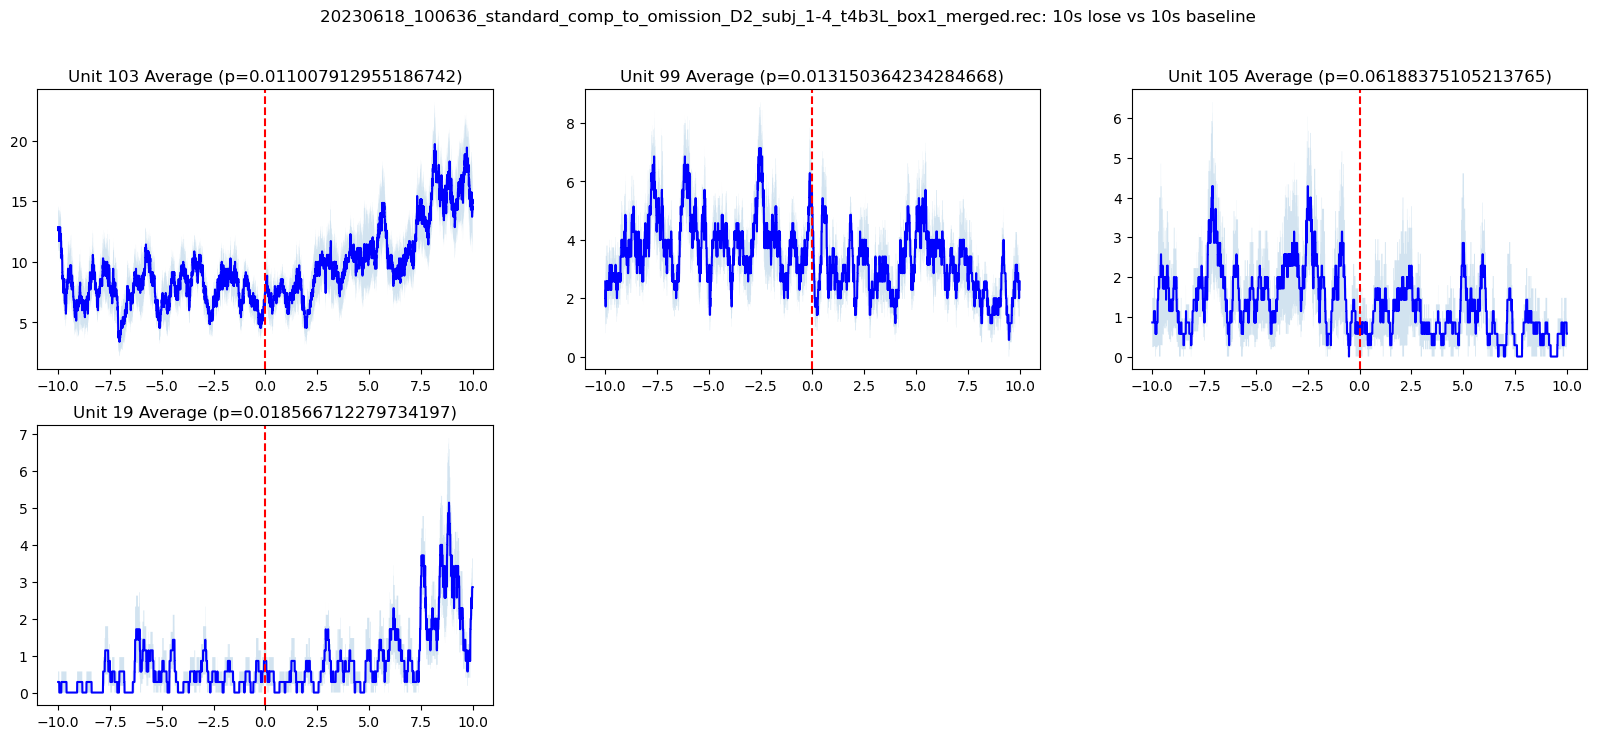

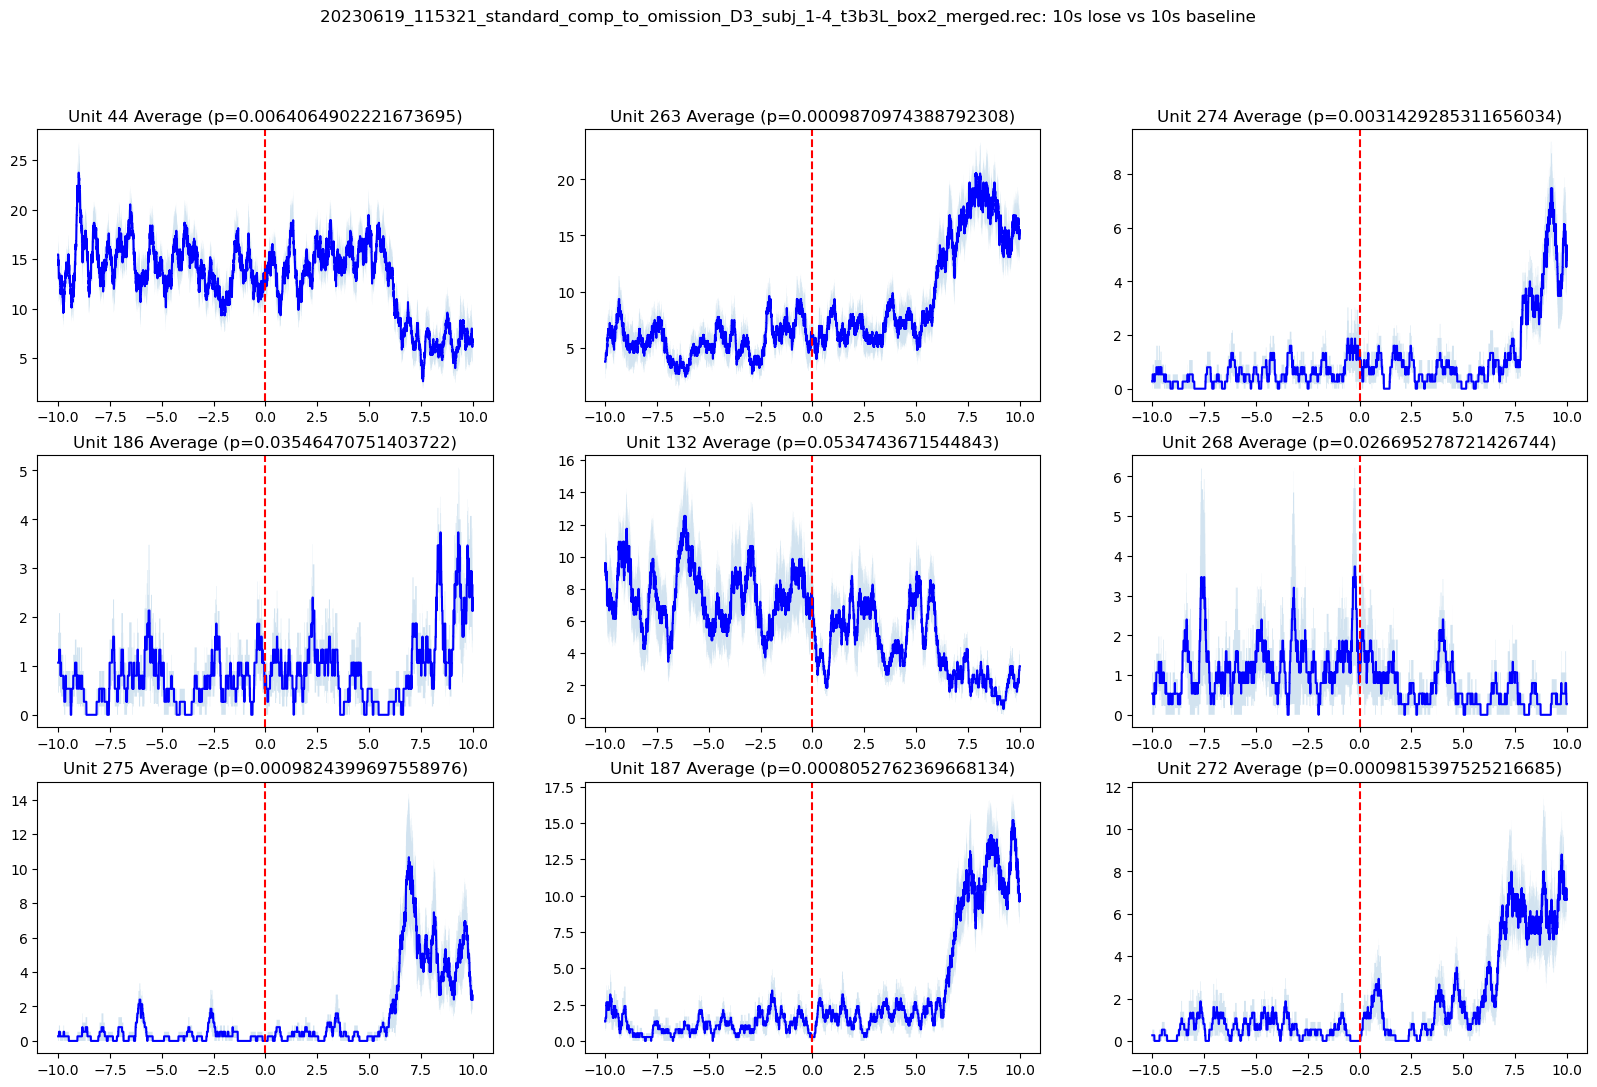

<Figure size 2000x0 with 0 Axes>

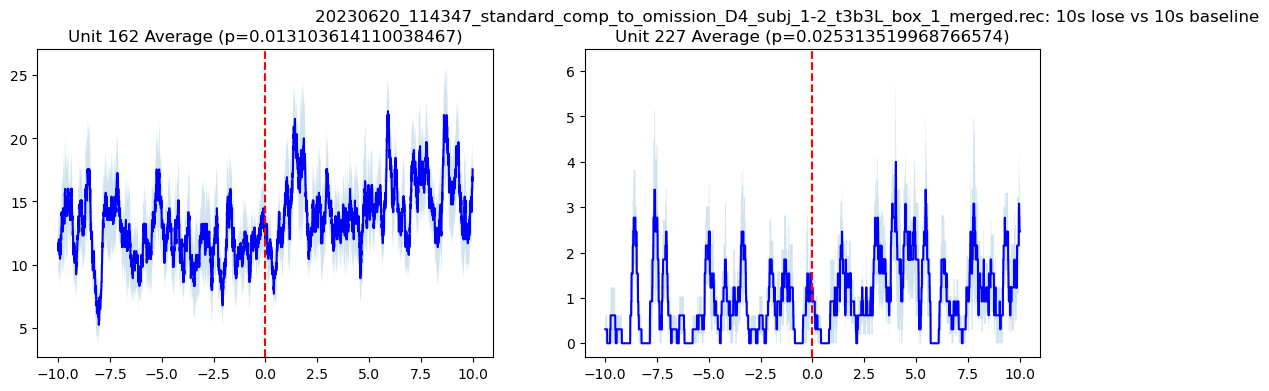

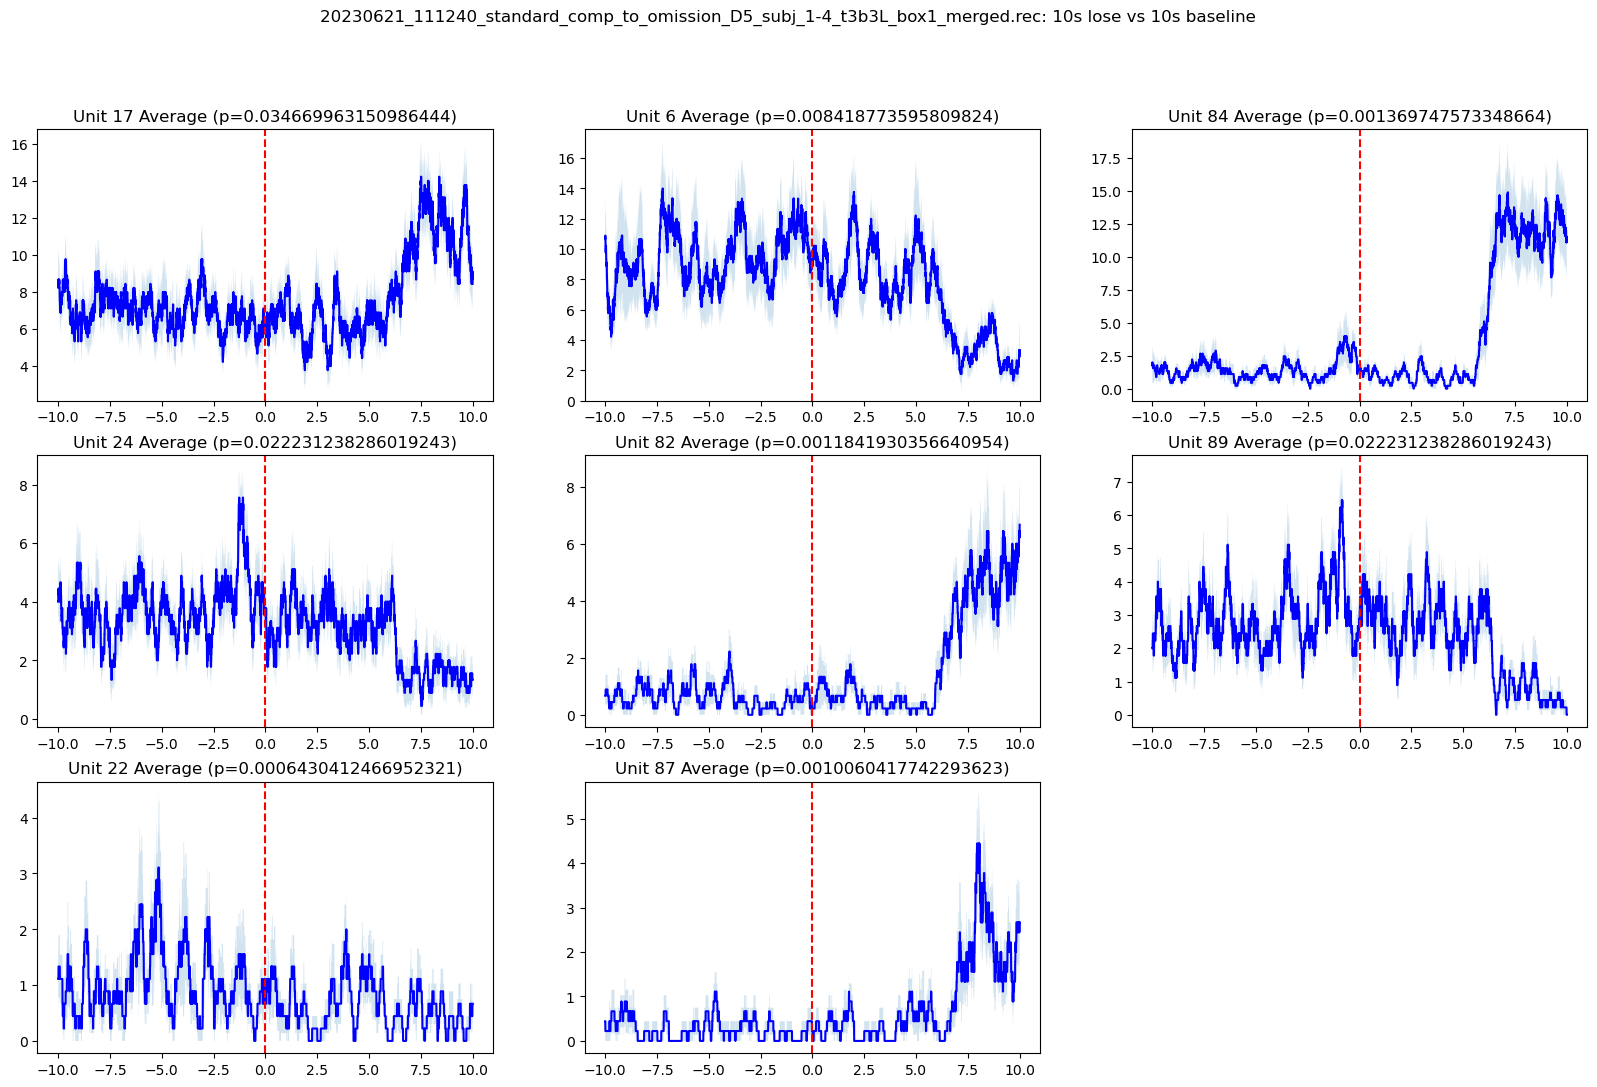

C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal ap

ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [9]:
omis_wilcox_rewarded = omission_spikes.wilcox_baseline_v_event_collection('rewarded', 10, 10)
omis_wilcox_win = omission_spikes.wilcox_baseline_v_event_collection('win', 10, 10)
omis_wilcox_lose = omission_spikes.wilcox_baseline_v_event_collection('lose', 10, 10)
omis_wilcox_omission = omission_spikes.wilcox_baseline_v_event_collection('omission', 10, 10)
omis_wilcox_both_rewarded = omission_spikes.wilcox_baseline_v_event_collection('both_rewarded', 10, 10)
omis_wilcox_tie = omission_spikes.wilcox_baseline_v_event_collection('tie', 10, 10)

In [11]:
omis_wilcox_both_rewarded = omission_spikes.wilcox_baseline_v_event_collection('both_rewarded', 10, 10)
omis_wilcox_tie = omission_spikes.wilcox_baseline_v_event_collection('tie', 10, 10)

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

<Figure size 2000x0 with 0 Axes>

In [12]:
omis_wilcox_omission = omission_spikes.wilcox_baseline_v_event_collection('omission', 10, 10)

C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal ap

ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [10]:
# Add a new column 'Source' to each DataFrame to indicate its origin
omis_wilcox_win['Source'] = 'win'
omis_wilcox_lose['Source'] = 'lose'
omis_wilcox_rewarded['Source'] = 'rewarded'
omis_wilcox_omission['Source'] = 'omission'
omis_wilcox_both_rewarded['Source'] = 'both_rewarded'
omis_wilcox_tie['Source'] = 'tie'

# Combine all DataFrames into one
omis_combined_df = pd.concat([
    omis_wilcox_win,
    omis_wilcox_lose,
    omis_wilcox_rewarded,
    omis_wilcox_omission,
    omis_wilcox_both_rewarded,
    omis_wilcox_tie
], ignore_index=True)

NameError: name 'omis_wilcox_omission' is not defined

In [14]:
# Assuming 'ephyscollection' is an instance of EphysRecordingCollection or similar
collection_keys = ephys_data.collection.keys()

# Print out the keys
for key in collection_keys:
    print(key)

20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec
20230618_100636_standard_comp_to_omission_D2_subj_1-1_t1b2L_box2_merged.rec
20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec
20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec
20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec
20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec


In [15]:

recording_id = "20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec"
recording_obj = ephys_data.collection[recording_id]

# Assuming 'recording_obj' is your EphysRecording object for the specific recording_id
event_dict = recording_obj.event_dict

# Print out the entire event_dict
print(event_dict)


{'rewarded': array([], dtype=int64), 'win': array([[ 171543,  181543],
       [ 286544,  296544],
       [ 431544,  441543],
       [ 481543,  491543],
       [ 576543,  586543],
       [ 651543,  661543],
       [ 756543,  766543],
       [ 806543,  816543],
       [ 886543,  896543],
       [ 951543,  961543],
       [1016543, 1026543],
       [1066543, 1076543],
       [1136543, 1146543],
       [1231543, 1241543],
       [1629023, 1639023],
       [1709023, 1719023],
       [1779023, 1789023],
       [1889023, 1899023],
       [1949023, 1959023]], dtype=int64), 'lose': array([[ 51543,  61543],
       [376543, 386543]], dtype=int64), 'omission': array([], dtype=int64), 'both_rewarded': array([], dtype=int64), 'tie': array([], dtype=int64)}


In [16]:
# Assuming 'ephyscollection' is an instance of EphysRecordingCollection or similar
collection_keys = ephys_data.collection.keys()

# Print out the keys
for key in collection_keys:
    recording_id = key
    recording_obj = ephys_data.collection[recording_id]
    event_dict = recording_obj.event_dict
    print(event_dict)

{'rewarded': array([], dtype=int64), 'win': array([[ 171543,  181543],
       [ 286544,  296544],
       [ 431544,  441543],
       [ 481543,  491543],
       [ 576543,  586543],
       [ 651543,  661543],
       [ 756543,  766543],
       [ 806543,  816543],
       [ 886543,  896543],
       [ 951543,  961543],
       [1016543, 1026543],
       [1066543, 1076543],
       [1136543, 1146543],
       [1231543, 1241543],
       [1629023, 1639023],
       [1709023, 1719023],
       [1779023, 1789023],
       [1889023, 1899023],
       [1949023, 1959023]], dtype=int64), 'lose': array([[ 51543,  61543],
       [376543, 386543]], dtype=int64), 'omission': array([], dtype=int64), 'both_rewarded': array([], dtype=int64), 'tie': array([], dtype=int64)}
{'rewarded': array([], dtype=int64), 'win': array([[ 51543,  61543],
       [376543, 386543]], dtype=int64), 'lose': array([[ 171543,  181543],
       [ 286544,  296544],
       [ 431544,  441543],
       [ 481543,  491543],
       [ 576543,  5865